In [9]:
import matplotlib.pyplot as plt
import random
import os
from torchvision import transforms
import cv2
from util import pad_img
import torch
from model import ResNet50
import numpy as np

In [40]:
awake = r"D:\data\awake"
drowsy = r"D:\data\drowsy"
#Create list of (img, label) tuples
data = []
for file in os.listdir(awake):
  img_path = os.path.join(awake, file)
  img = cv2.imread(img_path)   
  img = transforms.ToTensor()(img)  
  img = pad_img(img, 60, 80)
  data.append((img, 0))  

for file in os.listdir(drowsy):
  img_path = os.path.join(drowsy, file)
  img = cv2.imread(img_path)   
  img = transforms.ToTensor()(img)  
  img = pad_img(img, 60, 80)
  data.append((img, 1))  

In [59]:
#Load model
device = "cuda" if torch.cuda.is_available() else "cpu"
#Load model
model = ResNet50(1).to(device)
model.load_state_dict(torch.load("model_second.pth"))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (batch_norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (max_pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (batch_norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (i_downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, m

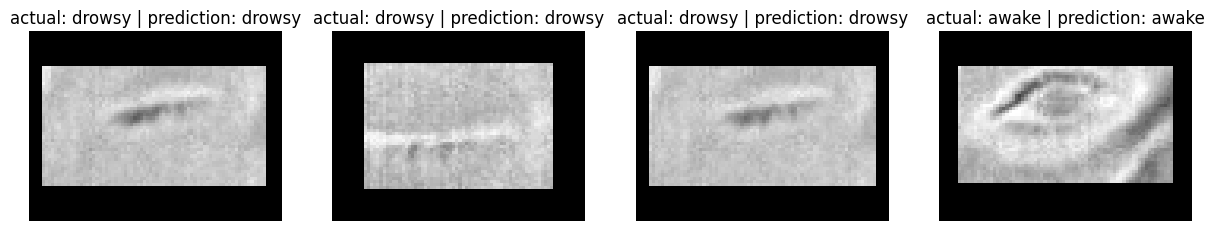

In [65]:
#Test 4 random imgs
random_indices = random.sample(range(700), 4)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

prediction = ""
actual = ""
for i, ax in enumerate(axes):
    idx = random_indices[i]
    #Model prediction
    img = data[idx][0]
    img = img.unsqueeze(dim=0)
    img = img.to(device)

    pred = model(img)

    output = torch.sigmoid(pred)

    if output >= 0.5:
        prediction = "drowsy"
    else:
        prediction = "awake"
        
    img_transposed = np.transpose(data[idx][0], (1, 2, 0))

    ax.imshow(img_transposed)  # Plot the image on the subplot

    if data[idx][1] == 1:
        actual = "drowsy"
    else:
        actual = "awake"
    ax.set_title(f"actual: {actual} | prediction: {prediction}") 
    ax.axis("off")
